In [1]:
!pip install kaggle

In [2]:
!mkdir ~/.kaggle

In [3]:
!cp kaggle.json ~/.kaggle/

In [4]:
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download kazanova/sentiment140

 85% 69.0M/80.9M [00:00<00:00, 82.2MB/s]
100% 80.9M/80.9M [00:00<00:00, 110MB/s] 


In [6]:
!unzip sentiment140.zip

Archive:  sentiment140.zip
  inflating: training.1600000.processed.noemoticon.csv  


In [7]:
import pandas as pd
cols = ['target','id','date','flag','user','text']
df = pd.read_csv('/content/training.1600000.processed.noemoticon.csv',encoding='ISO-8859-1' ,names=cols)

In [8]:
df.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [9]:
df['target'].value_counts

<bound method IndexOpsMixin.value_counts of 0          0
1          0
2          0
3          0
4          0
          ..
1599995    4
1599996    4
1599997    4
1599998    4
1599999    4
Name: target, Length: 1600000, dtype: int64>

In [10]:
df = df[['text','target']]
df

,text,target
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0
...,...,...
1599995,Just woke up. Having no school is the best fee...,4
1599996,TheWDB.com - Very cool to hear old Walt interv...,4
1599997,Are you ready for your MoJo Makeover? Ask me f...,4
1599998,Happy 38th Birthday to my boo of alll time!!! ...,4


([<matplotlib.axis.XTick at 0x7f3d2ba42450>,
 [Text(0, 0, 'Negative'), Text(0, 0, 'Positive')])

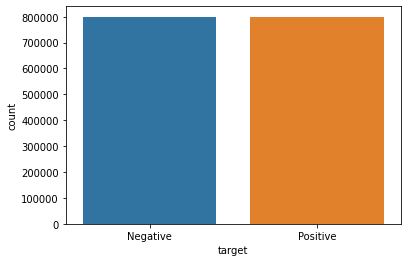

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(data=df,x='target')
plt.xticks(ticks=[0,1],labels=['Negative','Positive'])

In [12]:
import re
import string
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.corpus import stopwords
stopwords = stopwords.words('english')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
def clean_text(text):
    text = text.lower()
    pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    text = pattern.sub('', text)
        
    emoji = re.compile("["
                       u"\U0001F600-\U0001FFFF"  # emoticons
                       u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                       u"\U0001F680-\U0001F6FF"  # transport & map symbols
                       u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                       u"\U00002702-\U000027B0"
                       u"\U000024C2-\U0001F251"
                       "]+", flags=re.UNICODE)
    text = emoji.sub(r'', text)
        
    text = re.sub(r"i'm", "i am", text)
    text = re.sub(r"he's", "he is", text)
    text = re.sub(r"she's", "she is", text)
    text = re.sub(r"that's", "that is", text)        
    text = re.sub(r"what's", "what is", text)
    text = re.sub(r"where's", "where is", text) 
    text = re.sub(r"\'ll", " will", text)  
    text = re.sub(r"\'ve", " have", text)  
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"don't", "do not", text)
    text = re.sub(r"did't", "did not", text)
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"it's", "it is", text)
    text = re.sub(r"couldn't", "could not", text)
    text = re.sub(r"have't", "have not", text)    
    text = re.sub(r"[,.\"!@#$%^&*(){}?/;`~:<>+=-]", "", text)
    text = re.sub(r"http\S+|www\S+|https\S+", "", text, flags = re.MULTILINE)
    text = text.translate(str.maketrans("", "", string.punctuation))
    text = re.sub(r'\@\w+|\@', "", text)
    text = re.sub('[0-9]+', '', text)
    text = re.sub(r"http\S+|www\S+|https\S+", "", text, flags = re.MULTILINE)
    text = text.translate(str.maketrans("", "", string.punctuation))
    text = re.sub(r'\@\w+|\@', "", text)
    text = re.sub('[0-9]+', '', text)
    tokens = word_tokenize(text)
    tokens = [t for t in tokens if t not in stopwords]
    lemmatizer = WordNetLemmatizer()
    lemma_words = [lemmatizer.lemmatize(w, pos='a') for w in tokens]
        
    return " ".join(lemma_words).lower()

df.loc[:,'text'] = [clean_text(text) for text in df.loc[:,'text']]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [13]:
df = df.loc[795001:805000,:]
df

,text,target
795001,blah still daang got deep problems,0
795002,jenspeedy would suggest avoiding living goodne...,0
795003,alexbroun didnt convince fat ugly someone else...,0
795004,spotzle jstarrh check sunscreen snacks towels ...,0
795005,im sitting alone tte without two michigan sist...,0
...,...,...
804996,ickleoriental hahahha u obviously hv one maybe...,4
804997,juliekoh internet term spilled common use real...,4
804998,new day new track,4
804999,foodieguide okay need competition see whether ...,4


In [14]:
x = df['text']
y = df['target']

([<matplotlib.axis.XTick at 0x7f3d17a952d0>,
 [Text(0, 0, 'Negative'), Text(0, 0, 'Positive')])

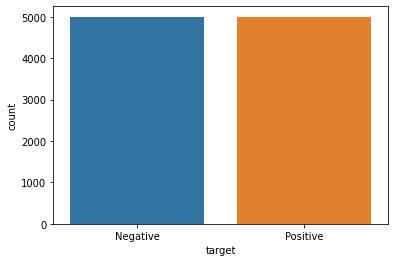

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(data=df,x='target')
plt.xticks(ticks=[0,1],labels=['Negative','Positive'])

In [16]:
y.value_counts

<bound method IndexOpsMixin.value_counts of 795001    0
795002    0
795003    0
795004    0
795005    0
         ..
804996    4
804997    4
804998    4
804999    4
805000    4
Name: target, Length: 10000, dtype: int64>

In [17]:
df.head()

,text,target
795001,blah still daang got deep problems,0
795002,jenspeedy would suggest avoiding living goodne...,0
795003,alexbroun didnt convince fat ugly someone else...,0
795004,spotzle jstarrh check sunscreen snacks towels ...,0
795005,im sitting alone tte without two michigan sist...,0


In [18]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer

In [19]:
tokenizer = Tokenizer(num_words=10000) #num_words says the number of top frequent words
tokenizer.fit_on_texts(x)
sequences = tokenizer.texts_to_sequences(x)
word_index = tokenizer.word_index

In [20]:
x

795001                   blah still daang got deep problems
795002    jenspeedy would suggest avoiding living goodne...
795003    alexbroun didnt convince fat ugly someone else...
795004    spotzle jstarrh check sunscreen snacks towels ...
795005    im sitting alone tte without two michigan sist...
                                ...                        
804996    ickleoriental hahahha u obviously hv one maybe...
804997    juliekoh internet term spilled common use real...
804998                                    new day new track
804999    foodieguide okay need competition see whether ...
805000    perfectelement noooooooo wish saw advertised l...
Name: text, Length: 10000, dtype: object

In [21]:
print(sequences[2])
print(sequences[5])

[5385, 48, 2530, 622, 1098, 149, 403, 154, 1, 198, 63, 378, 56]
[3394, 331, 456, 5393, 9, 265, 56, 679, 123, 5394, 110, 750, 3395]


In [22]:
#Check input length...should be in same size
max = 0
for i in range(len(sequences)):
  word_number = len(sequences[i])
  if (word_number) > (max):
    max = word_number
print(max)

32


In [23]:
#Padding shorter sequences
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
x = pad_sequences(sequences, padding = 'post', maxlen = max)
y = np.asarray(y)
x[:1]

array([[2042,   30, 5380,    9, 1097,  856,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0]],
      dtype=int32)

In [24]:
y #Before changing values

array([0, 0, 0, ..., 4, 4, 4])

In [25]:
import numpy as np
y = np.where(y==4,2,y)
y = np.asarray(y)
y

array([0, 0, 0, ..., 2, 2, 2])

In [26]:
from tensorflow.keras.utils import to_categorical
num_classes = 3
y = to_categorical(y, num_classes)
y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [27]:
y.shape

(10000, 3)

In [28]:
from tensorflow.keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Embedding, Dropout

In [29]:
#Creating model
model = Sequential()
model.add(Embedding(10000, 256, input_length = x.shape[1]))
model.add(Dropout(0.3))
model.add(LSTM(100, return_sequences=True, dropout=0.3, recurrent_dropout=0.2))
model.add(LSTM(100, dropout=0.3, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))

In [30]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 32, 256)           2560000   
                                                                 
 dropout (Dropout)           (None, 32, 256)           0         
                                                                 
 lstm (LSTM)                 (None, 32, 100)           142800    
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 3)                 303       
                                                                 
Total params: 2,783,503
Trainable params: 2,783,503
Non-trainable params: 0
_________________________________________________________________


In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [32]:
y_test.shape

(2000, 3)

In [33]:
#Training model
model.fit(x_train,y_train, epochs=20, batch_size=1000, verbose=1)

Epoch 1/20
8/8 [==============================] - 31s 3s/step - loss: 0.5855 - accuracy: 0.5011
Epoch 2/20
8/8 [==============================] - 22s 3s/step - loss: 0.4645 - accuracy: 0.4949
Epoch 3/20
8/8 [==============================] - 21s 3s/step - loss: 0.4627 - accuracy: 0.5010
Epoch 4/20
8/8 [==============================] - 22s 3s/step - loss: 0.4631 - accuracy: 0.4964
Epoch 5/20
8/8 [==============================] - 20s 2s/step - loss: 0.4629 - accuracy: 0.4965
Epoch 6/20
8/8 [==============================] - 18s 2s/step - loss: 0.4632 - accuracy: 0.5040
Epoch 7/20
8/8 [==============================] - 19s 2s/step - loss: 0.4629 - accuracy: 0.5038
Epoch 8/20
8/8 [==============================] - 19s 2s/step - loss: 0.4623 - accuracy: 0.5106
Epoch 9/20
8/8 [==============================] - 19s 2s/step - loss: 0.4608 - accuracy: 0.5164
Epoch 10/20
8/8 [==============================] - 20s 3s/step - loss: 0.4450 - accuracy: 0.6150
Epoch 11/20
8/8 [======================

In [34]:
y_test.shape

(2000, 3)

In [35]:
from sklearn.metrics import confusion_matrix
y_test_arg=np.argmax(y_test,axis=1)
y_pred = np.argmax(model.predict(x_test),axis=1)
print('Confusion Matrix')
print(confusion_matrix(y_test_arg, y_pred))

Confusion Matrix
[[680 307]
 [201 812]]


In [36]:
from sklearn.metrics import accuracy_score
print('Accuracy')
print(accuracy_score(y_test_arg, y_pred) * 100, "%")

Accuracy
74.6 %


In [38]:
x.shape

(10000, 32)

In [47]:
a = ['i love it']
a = tokenizer.texts_to_sequences(a)
a = np.array(a)
a = pad_sequences(a,padding='post',maxlen=max)
print(a)
print(a.shape)
prediction = model.predict(np.array(a))
print(prediction[0][0].round(), prediction[0][1].round(), prediction[0][2].round())

[[15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0]]
(1, 32)
0.0 0.0 1.0


In [49]:
b = ['i hate it']
b = tokenizer.texts_to_sequences(b)
b = np.array(b)
b = pad_sequences(b,padding='post',maxlen=max)
print(b)
print(b.shape)
prediction = model.predict(np.array(b))
print(prediction[0][0].round(), prediction[0][1].round(), prediction[0][2].round())

[[90  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0]]
(1, 32)
1.0 0.0 0.0
